#TEAM 19 - Movie Revenue Prediction

##TEAM MEMBERS

1. CB.EN.U4CSE19017 - GOMATHI.R
2. CB.EN.U4CSE19033 - MANAV PATNAIK
3. CB.EN.U4CSE19058 - V.SAIPADMESH

In [818]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import scipy
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')

## Introduction

  IMDb is the most popular movie website and it combines movie plot description, Metastore ratings, critic and user ratings and reviews, release dates, and many more aspects. The website is well known for storing almost every movie that has ever been released. IMDb stores information related to more than 6 million titles and it is owned by Amazon since 1998. 

  This dataset contains a collection of 5000 movies with attributes like Color, Director name, number of critic reviews, duration, gross income, genre, actor names, and their Facebook followers/likes count. This would allow us to perform extensive analysis on movies, based on their color, genre, and directors, etc., and come to significant conclusions about them. The metadata about the movies reveals a lot about the performance of the directors, actors, and the relationship between the gross income with several other factors. 

  Our aim as a team is to process and clean the data given in this dataset, draw graphs to visualize and thus, better understand the dataset.

Dataset link: [IMDB Movies](https://github.com/manavpatnaik/Machine-Learning-Algorithms/tree/main/MovieRevenuePrediction)

## Importing and merging datasets

In [819]:
# Dataset public links
movies = 'https://raw.githubusercontent.com/manavpatnaik/Machine-Learning-Algorithms/main/MovieRevenuePrediction/movies.csv'
actors = 'https://raw.githubusercontent.com/manavpatnaik/Machine-Learning-Algorithms/main/MovieRevenuePrediction/actors.csv'
directors = 'https://raw.githubusercontent.com/manavpatnaik/Machine-Learning-Algorithms/main/MovieRevenuePrediction/directors.csv'

In [820]:
movie_df = pd.read_csv(movies)
actor_df = pd.read_csv(actors)
director_df = pd.read_csv(directors)

In [821]:
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN,0


In [822]:
actor_df.head()

,actor_1_name,actor_2_name,actor_1_facebook_likes,actor_2_facebook_likes
0,CCH Pounder,Joel David Moore,1000.0,936.0
1,Johnny Depp,Orlando Bloom,40000.0,5000.0
2,Christoph Waltz,Rory Kinnear,11000.0,393.0
3,Tom Hardy,Christian Bale,27000.0,23000.0
4,Doug Walker,Rob Walker,131.0,12.0


In [823]:
director_df.head()

,director_name,director_facebook_likes
0,James Cameron,0.0
1,Gore Verbinski,563.0
2,Sam Mendes,0.0
3,Christopher Nolan,22000.0
4,Doug Walker,131.0


Combining dataframes

In [824]:
temp = pd.concat([movie_df, director_df], axis=1)
temp = pd.concat([temp, actor_df], axis=1)
temp

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,director_name,director_facebook_likes,actor_1_name,actor_2_name,actor_1_facebook_likes,actor_2_facebook_likes
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000,James Cameron,0.0,CCH Pounder,Joel David Moore,1000.0,936.0
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,7.1,2.35,0,Gore Verbinski,563.0,Johnny Depp,Orlando Bloom,40000.0,5000.0
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000,Sam Mendes,0.0,Christoph Waltz,Rory Kinnear,11000.0,393.0
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000,Christopher Nolan,22000.0,Tom Hardy,Christian Bale,27000.0,23000.0
4,NaN,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN,0,Doug Walker,131.0,Doug Walker,Rob Walker,131.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,Daphne Zuniga,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,7.7,NaN,84,Scott Smith,2.0,Eric Mabius,Daphne Zuniga,637.0,470.0
5039,Color,NaN,43.0,43.0,Valorie Curry,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,7.5,16.00,32000,NaN,NaN,Natalie Zea,Valorie Curry,841.0,593.0
5040,Color,Benjamin Roberds,13.0,76.0,Maxwell Moody,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,6.3,NaN,16,Benjamin Roberds,0.0,Eva Boehnke,Maxwell Moody,0.0,0.0
5041,Color,Daniel Hsia,14.0,100.0,Daniel Henney,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,6.3,2.35,660,Daniel Hsia,0.0,Alan Ruck,Daniel Henney,946.0,719.0


In [825]:
df = temp.loc[:,~temp.columns.duplicated()]

## Data preprocessing

In [826]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
actor_2_name                  object
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
director_facebook_likes      float64
actor_1_facebook_likes       float64
actor_2_facebook_likes       float64
dtype: object

In [827]:
df.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes
count,4993.000000,5028.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5043.000000,4714.000000,5043.000000,4939.000000,5036.000000,5030.000000
mean,140.194272,107.201074,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,6.442138,2.220403,7525.964505,686.509212,6560.047061,1651.754473
std,121.601675,25.197441,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,1.125116,1.385113,19320.445110,2813.328607,15020.759120,4042.438863
min,1.000000,7.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,1.600000,1.180000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,93.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,5.800000,1.850000,0.000000,7.000000,614.000000,281.000000
50%,110.000000,103.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,6.600000,2.350000,166.000000,49.000000,988.000000,595.000000
75%,195.000000,118.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,7.200000,2.350000,3000.000000,194.500000,11000.000000,918.000000
max,813.000000,511.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,9.500000,16.000000,349000.000000,23000.000000,640000.000000,137000.000000


Processing the genre field

In [828]:
genres = df['genres'].str.split('|', expand=True)
df['genre'] = genres[0]

In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   actor_2_name               5030 non-null   object 
 5   gross                      4159 non-null   float64
 6   genres                     5043 non-null   object 
 7   actor_1_name               5036 non-null   object 
 8   movie_title                5043 non-null   object 
 9   num_voted_users            5043 non-null   int64  
 10  cast_total_facebook_likes  5043 non-null   int64  
 11  facenumber_in_poster       5030 non-null   float64
 12  plot_keywords              4890 non-null   object 
 13  movie_imdb_link            5043 non-null   objec

## Dropping unnecessary columns

- title_year
- movie_imdb_link
- genres
- plot_keywords
- color
- director_name
- actor_1_name
- actor_2_name

Director and actor names are dropped. Only their facebook_likes are required


In [830]:
df = df.drop(['title_year', 'movie_imdb_link', 'genres', 'plot_keywords'], axis=1)

Dealing with NULL Values

In [831]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
actor_2_name                  13
gross                        884
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
director_facebook_likes      104
actor_1_facebook_likes         7
actor_2_facebook_likes        13
genre                          0
dtype: int64

In [832]:
# Percentage of NULL values
df.isna().sum()*100/len(df)

color                         0.376760
director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
actor_2_name                  0.257783
gross                        17.529248
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
facenumber_in_poster          0.257783
num_user_for_reviews          0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
imdb_score                    0.000000
aspect_ratio                  6.523895
movie_facebook_likes          0.000000
director_facebook_likes       2.062265
actor_1_facebook_likes        0.138806
actor_2_facebook_likes        0.257783
genre                         0.000000
dtype: float64

In [833]:
df.dropna(subset=['num_critic_for_reviews','duration','director_facebook_likes','actor_1_facebook_likes','facenumber_in_poster','num_user_for_reviews','language','country','content_rating','budget','actor_2_facebook_likes','aspect_ratio'],axis=0,inplace=True)
df.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,imdb_score,aspect_ratio,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,genre
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,CCH Pounder,Avatar,886204,4834,0.0,3054.0,English,USA,PG-13,237000000.0,7.9,1.78,33000,0.0,1000.0,936.0,Action
1,Color,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,0.0,1238.0,English,USA,PG-13,300000000.0,7.1,2.35,0,563.0,40000.0,5000.0,Action
2,Color,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Spectre,275868,11700,1.0,994.0,English,UK,PG-13,245000000.0,6.8,2.35,85000,0.0,11000.0,393.0,Action
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,0.0,2701.0,English,USA,PG-13,250000000.0,8.5,2.35,164000,22000.0,27000.0,23000.0,Action
5,Color,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Daryl Sabara,John Carter,212204,1873,1.0,738.0,English,USA,PG-13,263700000.0,6.6,2.35,24000,475.0,640.0,632.0,Action


In [834]:
len(df)

4179

In [835]:
df.dropna(inplace=True)
len(df)

3774

In [836]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
actor_2_name                 0
gross                        0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
director_facebook_likes      0
actor_1_facebook_likes       0
actor_2_facebook_likes       0
genre                        0
dtype: int64

## Visualization

In [837]:
font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 18}

matplotlib.rc('font', **font)

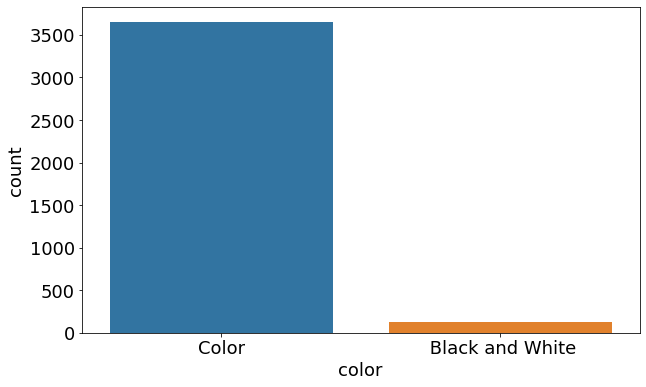

In [838]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='color');

In [839]:
(df['color'].value_counts().values[0]/len(df))*100

96.71436142024378

Around 97% movies are are in color.

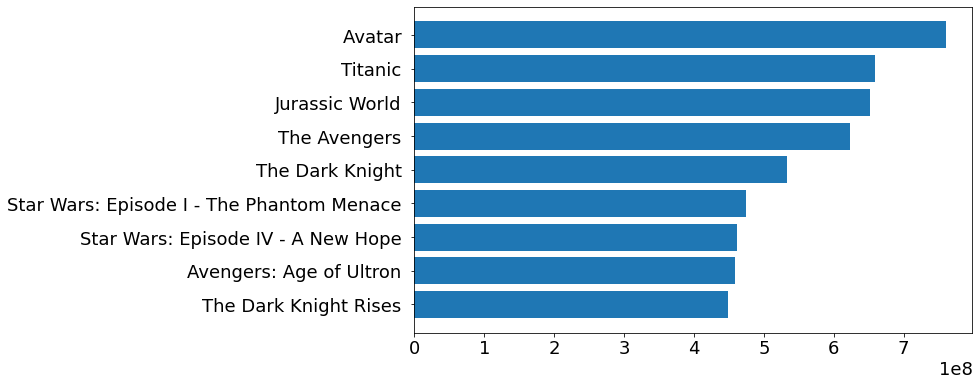

In [840]:
top_ten = df.sort_values('gross', ascending=False).iloc[:10, :][['movie_title', 'gross']]
movies = list(top_ten['movie_title'])
gross = list(top_ten['gross'])
plt.figure(figsize=(10,6))
plt.barh(movies[::-1], gross[::-1]);

Avatar is the highest grossing movie

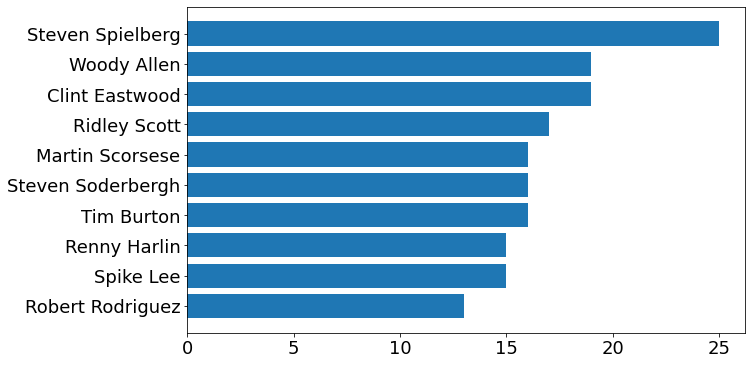

In [841]:
top_directors = df.groupby('director_name').count()
top_directors = top_directors.sort_values('color', ascending=False)
top_directors = top_directors.iloc[:10, :1]
plt.figure(figsize=(10,6))
plt.barh(top_directors.index[::-1], top_directors['color'][::-1]);

Steven Speilberg seems to have directed most number of movies

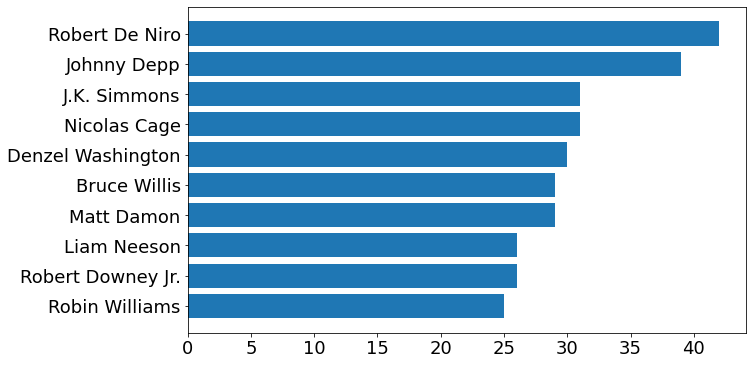

In [842]:
top_actors = df.groupby('actor_1_name').count()
top_actors = top_actors.sort_values('color', ascending=False)
top_actors = top_actors.iloc[:10, :1]
plt.figure(figsize=(10,6))
plt.barh(top_actors.index[::-1], top_actors['color'][::-1]);

Robert De Niro seems to have acted in most of the movies (Around 50)

In [843]:
df2 = df[['num_critic_for_reviews', 'budget', 'color',  'gross']]

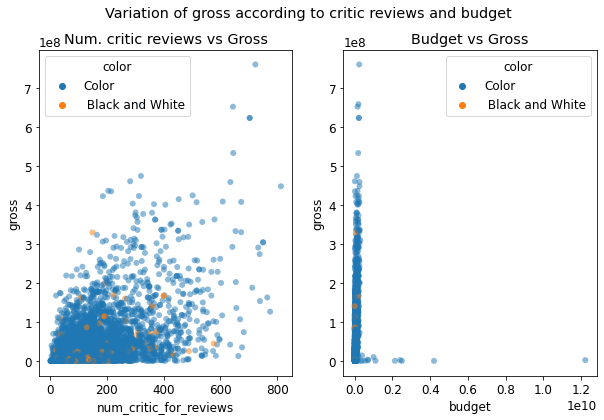

In [844]:
font = {'weight' : 'regular',
        'size'   : 12}
matplotlib.rc('font', **font)

fig, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].set_title('Num. critic reviews vs Gross')
axes[1].set_title('Budget vs Gross')
fig.suptitle('Variation of gross according to critic reviews and budget')

sns.scatterplot(ax=axes[0], x=df2['num_critic_for_reviews'], y=df['gross'], hue=df['color'], alpha=0.5, edgeColors=None)
sns.scatterplot(ax=axes[1], x=df2['budget'], y=df['gross'], hue=df['color'], alpha=0.5, edgeColors=None);

- There is not much significant relationship between number of critic reviews and gross income

- But here we can also see that higher budget need not necessarily give higher gross



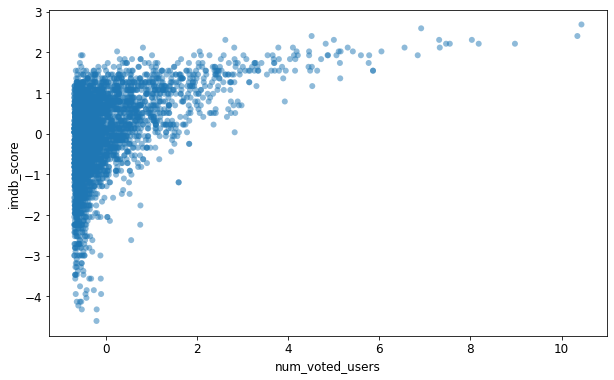

In [845]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ndf, x='num_voted_users', y='imdb_score', alpha=0.5, edgeColors=None);

From here we can infer that 
- If there are more number of voters for a movie, its rating is definitely going to be very high.

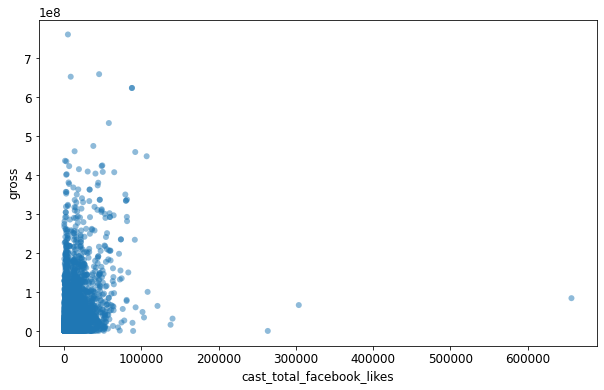

In [846]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='cast_total_facebook_likes', y='gross',alpha=0.5, edgeColors=None);

Having a huge number of facebook likes does not affect the gross income of the actors' movie

In [847]:
top_directors = df.groupby('director_name').count().sort_values('color', ascending=False).iloc[:10,:]
top_directors

df3 = pd.DataFrame(columns=['director_name', 'gross'])
for i in top_directors.index:
  df3 = df3.append(df[df['director_name'] == i][['director_name','gross']])
df3

,director_name,gross
54,Steven Spielberg,317011114.0
178,Steven Spielberg,52792307.0
189,Steven Spielberg,234277056.0
194,Steven Spielberg,77564037.0
284,Steven Spielberg,132014112.0
...,...,...
2253,Robert Rodriguez,25753840.0
2305,Robert Rodriguez,7268659.0
2634,Robert Rodriguez,40064955.0
3479,Robert Rodriguez,25625110.0


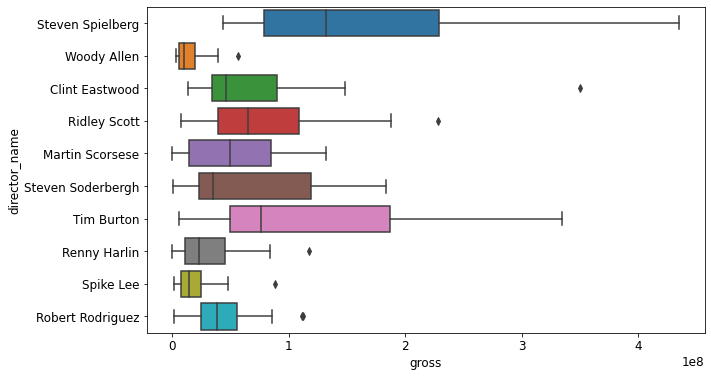

In [848]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df3, y='director_name', x='gross');

Steven Spielberg's movies avg gross is higher than any other director. His movies gross also range wide across many values.

<BarContainer object of 17 artists>

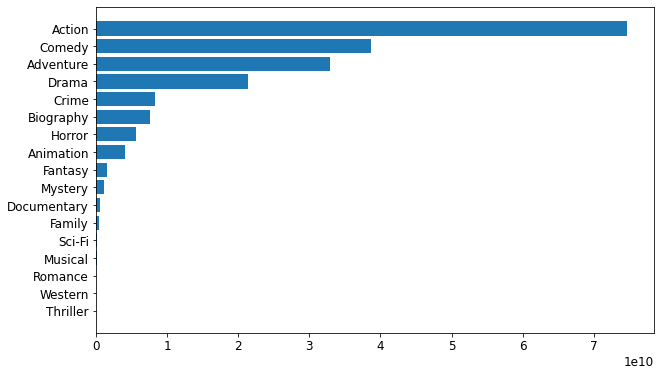

In [849]:
genredf = df.groupby('genre').sum()
genredf = genredf.sort_values('gross', ascending=False)
genre = list(genredf.index)
gross = list(genredf.gross)
plt.figure(figsize=(10,6))
plt.barh(genre[::-1], gross[::-1])

Action, Comedy and then Adventure are the top grossing genres

## Data Normalization

In [850]:
df = df.drop(['color', 'director_name', 'actor_1_name', 'actor_2_name', 'movie_title'], axis=1)

In [851]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf_obj = df.select_dtypes(include='object')
df_columns = newdf.columns
z_score_scaler = preprocessing.StandardScaler()
ndf = z_score_scaler.fit_transform(newdf)
newdf = pd.DataFrame(ndf,columns=df_columns)

newdf['tmp'] = np.arange(len(newdf))
newdf_obj['tmp'] = np.arange(len(newdf_obj))
ndf = newdf_obj.join(newdf, on='tmp', lsuffix='_original', rsuffix='_normalized')
del ndf["tmp_original"]
del ndf["tmp_normalized"]

df = ndf
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5042
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   language                   3774 non-null   object 
 1   country                    3774 non-null   object 
 2   content_rating             3774 non-null   object 
 3   genre                      3774 non-null   object 
 4   num_critic_for_reviews     3774 non-null   float64
 5   duration                   3774 non-null   float64
 6   gross                      3774 non-null   float64
 7   num_voted_users            3774 non-null   float64
 8   cast_total_facebook_likes  3774 non-null   float64
 9   facenumber_in_poster       3774 non-null   float64
 10  num_user_for_reviews       3774 non-null   float64
 11  budget                     3774 non-null   float64
 12  imdb_score                 3774 non-null   float64
 13  aspect_ratio               3774 non-null   float

In [852]:
df.head()

,language,country,content_rating,genre,num_critic_for_reviews,duration,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,imdb_score,aspect_ratio,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes
0,English,USA,PG-13,Action,4.504169,2.995312,10.083700,5.143623,-0.348268,-0.674142,6.619325,0.846773,1.357791,-0.937145,1.105490,-0.262620,-0.433885,-0.237533
1,English,USA,PG-13,Action,1.095160,2.597690,3.659912,2.410031,1.931650,-0.674142,2.197518,1.126195,0.601031,0.677631,-0.435227,-0.078686,2.084174,0.658573
2,English,UK,PG-13,Action,3.524383,1.669905,2.103029,1.123203,0.011460,-0.183928,1.603399,0.882255,0.317246,0.677631,3.533287,-0.262620,0.211771,-0.357264
3,English,USA,PG-13,Action,5.232936,2.376789,5.635408,6.844003,4.991851,-0.674142,5.759800,0.904432,1.925360,0.677631,7.221669,6.924853,1.244821,4.627545
5,English,USA,PG-13,Action,2.390746,0.963021,0.294300,0.703834,-0.503403,-0.183928,0.980061,0.965195,0.128057,0.677631,0.685295,-0.107436,-0.457129,-0.304565


## Perform encoding

Onehot encoding

In [853]:
df = pd.get_dummies(df)
df.head()

,num_critic_for_reviews,duration,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,imdb_score,aspect_ratio,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,language_Aboriginal,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,...,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_Western
0,4.504169,2.995312,10.083700,5.143623,-0.348268,-0.674142,6.619325,0.846773,1.357791,-0.937145,1.105490,-0.262620,-0.433885,-0.237533,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.095160,2.597690,3.659912,2.410031,1.931650,-0.674142,2.197518,1.126195,0.601031,0.677631,-0.435227,-0.078686,2.084174,0.658573,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.524383,1.669905,2.103029,1.123203,0.011460,-0.183928,1.603399,0.882255,0.317246,0.677631,3.533287,-0.262620,0.211771,-0.357264,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.232936,2.376789,5.635408,6.844003,4.991851,-0.674142,5.759800,0.904432,1.925360,0.677631,7.221669,6.924853,1.244821,4.627545,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.390746,0.963021,0.294300,0.703834,-0.503403,-0.183928,0.980061,0.965195,0.128057,0.677631,0.685295,-0.107436,-0.457129,-0.304565,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Separating features and labels

In [854]:
X = df.drop('gross', axis=1)
y = df['gross']

In [855]:
X = scipy.sparse.csr_matrix(X.values)

## Train Test Splitting

In [856]:
from sklearn.model_selection import train_test_split

In [857]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Model Building

We train the following ML models on the dataset:

1. Linear Regression
2. SVM
3. Decision Trees (CART)   


### Linear Regression

### SVM

### Decision Trees

In [858]:
from sklearn.tree import DecisionTreeRegressor

In [859]:
model = DecisionTreeRegressor(splitter='best', criterion='mse')

In [860]:
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [861]:
preds = model.predict(X_test)

In [862]:
feature_importances = model.feature_importances_
feature_importances

array([6.88352361e-02, 3.25341307e-02, 4.40929485e-01, 2.10511572e-02,
       8.18267091e-03, 2.01291395e-02, 1.92105389e-01, 3.12875158e-02,
       5.97666145e-03, 2.02509780e-02, 2.94208603e-02, 1.56583039e-02,
       3.03347298e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.43559973e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.12065826e-04, 0.00000000e+00,
       1.37453019e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.80535844e-06, 0.00000000e+00,
       0.00000000e+00, 1.17578611e-10, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.60538792e-09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.22554603e-08, 0.00000000e+00, 2.35678762e-07, 0.00000000e+00,
       0.00000000e+00, 1.32622344e-08, 0.00000000e+00, 0.00000000e+00,
      

In [863]:
data = {
    'Feature Importance': feature_importances*100
}
importances = pd.DataFrame(index=df.drop('gross', axis=1).columns, data=data).sort_values('Feature Importance', ascending=False)
importances.iloc[:10]

,Feature Importance
num_voted_users,44.092948
budget,19.210539
num_critic_for_reviews,6.883524
duration,3.253413
imdb_score,3.128752
content_rating_R,3.091894
actor_2_facebook_likes,3.033473
director_facebook_likes,2.942086
cast_total_facebook_likes,2.105116
movie_facebook_likes,2.025098


In [864]:
from sklearn.tree import  plot_tree

In [865]:
# plt.figure(figsize=(12,8), dpi=200)
# plot_tree(model, feature_names=df.drop('gross', axis=1).columns, filled=True);

### Evaluating the model

In [866]:
from sklearn.metrics import mean_squared_error

In [867]:
mse = mean_squared_error(y_test, preds)
mse

0.5501591373110781

In [868]:
# RMSE
np.sqrt(mse)

0.7417271313030677

The error obtained is quite low.